# Card-Heining-Kline event study

In [1]:
# Add BipartitePandas to system path, do not run this
# import sys
# sys.path.append('../../..')

## Import the BipartitePandas package

Make sure to install it using `pip install bipartitepandas`.

In [2]:
import bipartitepandas as bpd

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Get your data ready

For this notebook, we simulate data.

In [3]:
df = bpd.SimBipartite().simulate()
bdf = bpd.BipartiteDataFrame(i=df['i'], j=df['j'], y=df['y'], t=df['t']).clean()
display(bdf)

checking required columns and datatypes
sorting rows
dropping NaN observations
generating 'm' column
keeping highest paying job for i-t (worker-year) duplicates (how='max')
dropping workers who leave a firm then return to it (how=False)
making 'i' ids contiguous
making 'j' ids contiguous
computing largest connected set (how=None)
sorting columns
resetting index


,i,j,y,t,m
0,0,167,1.292268,0,1
1,0,140,0.193523,1,1
2,0,140,-0.245807,2,0
3,0,140,0.416181,3,0
4,0,140,0.921116,4,0
...,...,...,...,...,...
49995,9999,82,-1.388451,0,0
49996,9999,82,1.762815,1,0
49997,9999,82,0.470800,2,0
49998,9999,82,-0.450919,3,0


## Creating CHK event study plot

#### Cluster data

We need to cluster the data using quartiles of firm-level mean income.

In [4]:
measures = bpd.measures.Moments(measures='mean')
grouping = bpd.grouping.Quantiles(n_quantiles=4)
bdf = bdf.cluster(bpd.cluster_params({'measures': measures, 'grouping': grouping}))

#### Plot

Once the data is clustered, we can generate the event study plots.

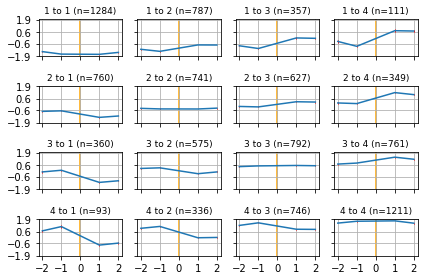

In [5]:
bdf.plot_extended_eventstudy(periods_pre=2, periods_post=2)

*Note:* be careful not to include too many clusters!

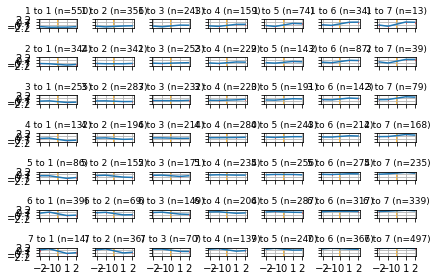

In [6]:
measures = bpd.measures.Moments(measures='mean')
grouping = bpd.grouping.Quantiles(n_quantiles=7)
bdf = bdf.cluster(bpd.cluster_params({'measures': measures, 'grouping': grouping}))
bdf.plot_extended_eventstudy(periods_pre=2, periods_post=2)